In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train=pd.read_table("10HW3_train.txt",sep=" ",header=None)
vad=pd.read_table("10HW3_validate.txt",sep=" ",header=None)
test=pd.read_table("10HW3_test.txt",sep=" ",header=None)

In [3]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,776,777,778,779,780,781,782,783,784,785
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,NaN
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,NaN
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,NaN
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,NaN


In [4]:
train=train.drop(columns=[785])
vad=vad.drop(columns=[785])
test=test.drop(columns=[785])

In [5]:
train_x=train.iloc[:,0:len(train.columns)-1]
train_y=train.iloc[:,784]
test_x=test.iloc[:,0:len(test.columns)-1]
test_y=test.iloc[:,784]
vad_x=vad.iloc[:,0:len(vad.columns)-1]
vad_y=vad.iloc[:,784]

In [6]:
from sklearn.neighbors import KNeighborsClassifier

In [7]:
#knn=KNeighborsClassifier(n_neighbors=5)
#knn.fit(train_x, train_y)
#pred_train=knn.predict(train_x)
#pred_vad=knn.predict(vad_x)
#err_train=len(np.where(((pred_train==train_y)==False))[0])/len(train_y)
#err_vad=len(np.where(((pred_vad==vad_y)==False))[0])/len(vad_y)

In [8]:
k=[1, 3, 5, 11, 16, 21]
err_train=[]
err_vad=[]
for i in range(len(k)):
    knn=KNeighborsClassifier(n_neighbors=k[i])
    knn.fit(train_x, train_y)
    pred_train=knn.predict(train_x)
    pred_vad=knn.predict(vad_x)
    err_train.append(len(np.where(((pred_train==train_y)==False))[0])/len(train_y))
    err_vad.append(len(np.where(((pred_vad==vad_y)==False))[0])/len(vad_y))

## a.

error is defined as the misclassification rate

Text(0, 0.5, 'error')

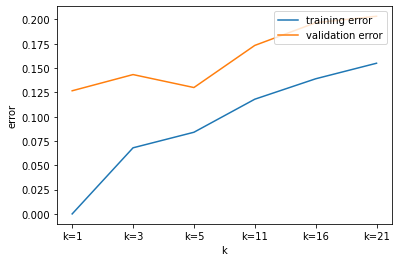

In [9]:
plt.plot(err_train)
plt.plot(err_vad)
x_axis=[0,1,2,3,4,5]
plt.xticks(x_axis,["k=1","k=3","k=5","k=11", "k=16", "k=21"])
plt.legend(['training error',"validation error"], loc='upper right')
plt.xlabel("k")
plt.ylabel("error")

In [10]:
pd.DataFrame({"k":[1,3,5,11,16,21],"training error":err_train,"validation error":err_vad})

,k,training error,validation error
0,1,0.000,0.126667
1,3,0.068,0.143333
2,5,0.084,0.130000
3,11,0.118,0.173333
4,16,0.139,0.196667
5,21,0.155,0.203333


k=1 perform the best on validation data (according too the defined error)

test error

In [11]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(train_x, train_y)
pred_test=knn.predict(test_x)
err_test=(len(np.where(((pred_test==test_y)==False))[0])/len(test_y))

In [12]:
err_test

0.10666666666666667

## b.

In [13]:
from sklearn.metrics import confusion_matrix

In [14]:
y_true = test_y

knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(train_x, train_y)
y_pred = knn.predict(test_x)

cm=confusion_matrix(y_true, y_pred)

In [15]:
a=(cm[0,:]/sum(cm[0,:])).tolist()
b=(cm[1,:]/sum(cm[1,:])).tolist()
c=(cm[2,:]/sum(cm[2,:])).tolist()
d=(cm[3,:]/sum(cm[3,:])).tolist()
e=(cm[4,:]/sum(cm[4,:])).tolist()
f=(cm[5,:]/sum(cm[5,:])).tolist()
g=(cm[6,:]/sum(cm[6,:])).tolist()
h=(cm[7,:]/sum(cm[7,:])).tolist()
i=(cm[8,:]/sum(cm[8,:])).tolist()
j=(cm[9,:]/sum(cm[9,:])).tolist()
cm=pd.DataFrame(np.array([a,b,c,d,e,f,g,h,i,j]))

In [16]:
cm

,0,1,2,3,4,5,6,7,8,9
0,0.892857,0.000000,0.000000,0.000000,0.000000,0.000000,0.107143,0.000000,0.000000,0.000000
1,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.052632,0.921053,0.000000,0.000000,0.000000,0.000000,0.000000,0.026316,0.000000
3,0.066667,0.100000,0.033333,0.733333,0.000000,0.000000,0.000000,0.000000,0.033333,0.033333
4,0.000000,0.000000,0.000000,0.000000,0.928571,0.000000,0.000000,0.000000,0.000000,0.071429
5,0.000000,0.000000,0.000000,0.076923,0.000000,0.846154,0.000000,0.038462,0.000000,0.038462
6,0.027027,0.054054,0.000000,0.000000,0.000000,0.000000,0.918919,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.933333,0.000000,0.066667
8,0.000000,0.000000,0.000000,0.035714,0.000000,0.000000,0.035714,0.000000,0.928571,0.000000
9,0.000000,0.000000,0.037037,0.000000,0.037037,0.000000,0.000000,0.000000,0.000000,0.925926


row is real value, column is predicted value

3 is the hardest one to be identify since the correct rate in it's class is the smallest

## c.

In [17]:
index=np.where((y_true==y_pred)==False)[0]

In [18]:
fasle_data=test_x.iloc[index,:]

In [19]:
fasle_data.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


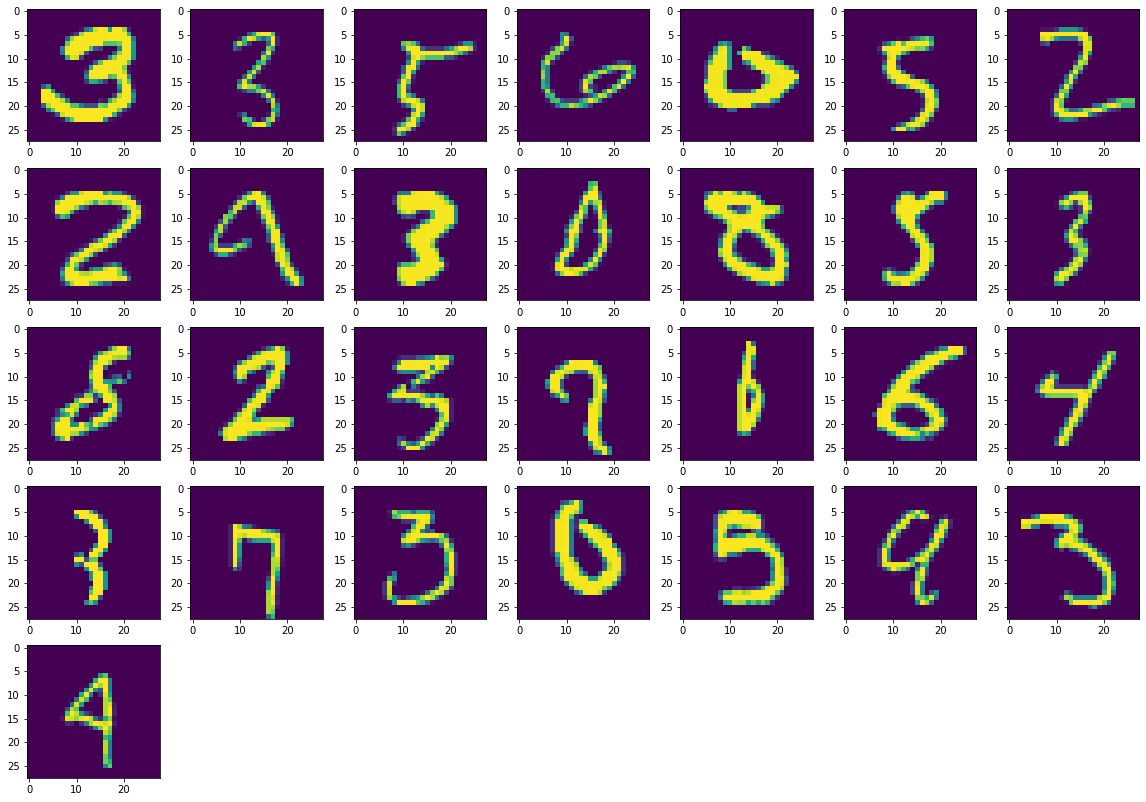

In [20]:
plt.figure(figsize=(20,20))
for i in range(len(index)):
    plt.subplot(7,7,i+1)
    plt.imshow(np.array(list(fasle_data.iloc[i,:])).reshape(28,28))

3果真出現不少次，且這些被分錯的字看起來都很醜